# <h1><center>**`Employee Attrition Problem`**</center></h1>

### `Dataset Desciption`

The dataset folder contains the following files:

**train_dataset.csv** = 1000000 x 8

**train_salaries.csv** = 1000000 x 2

**test_dataset.csv** =  1000000 x 8

Columns Provided in the Dataset

1. **jobId** - Unique ID that indicates the employee
2. **companyId** - Unique ID that idicates the company
3. **jobType** - Shows which post the employee is working for the company
4. **degree** - shows which degree is completed by the employee
5. **major** - shows the field in which the employee is specialised in
6. **industry** - show the industry in which the employee is working
7. **yearsExperience** - years of working experience the employee is having
8. **milesFromMetropolis** - distance in miles between the comapny and his house
9. **salary** - salary given to the employee.
eg. 250 indicates 2,50,000 in dollars

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [4]:
train_data = pd.read_csv('train_dataset.csv')
train_data_salaries = pd.read_csv('train_salaries.csv')
test_data = pd.read_csv('test_dataset.csv')

In [5]:
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [6]:
train_data_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [7]:
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [8]:
train_data = train_data.merge(train_data_salaries,on='jobId',how='inner')
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [9]:
train_data = train_data[train_data['salary']>30]

In [10]:
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [13]:
train_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,997548.000000,997548.000000,997548.000000
mean,12.015214,49.458372,116.280462
std,7.204992,28.863518,38.512936
min,0.000000,0.000000,31.000000
25%,6.000000,24.000000,89.000000
50%,12.000000,49.000000,114.000000
75%,18.000000,74.000000,141.000000
max,24.000000,99.000000,301.000000


In [14]:
test_data.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [15]:
print("Train Data :")
print(len(train_data))
print("Test Data :")
print(len(test_data))

Train Data :
997548
Test Data :
1000000


In [16]:
for x in train_data.columns:
    print(x,":",len(train_data[x].unique()))


jobId : 997548
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 265


In [17]:
for x in test_data.columns:
    print(x,":",len(test_data[x].unique()))

jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100


In [18]:
train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [19]:
test_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [20]:
train_data = train_data.drop(['jobId','companyId'],axis=1)
train_data.head()


,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [21]:
test_data = test_data.drop(['jobId','companyId'],axis=1)
test_data.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [22]:
categorical_list = []
var_list = []
for x in train_data.columns:
    if train_data[x].dtype=='object':
        categorical_list.append(x)
    else:
        var_list.append(x)


In [23]:
corr = train_data[var_list].corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.00,0.00,0.37
milesFromMetropolis,0.00,1.00,-0.29
salary,0.37,-0.29,1.00


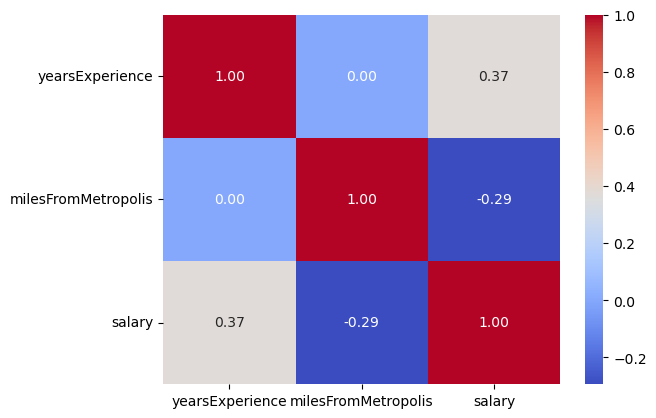

In [24]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [25]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def perform_chi_square_test(var_1, var_2):
    contingency_table = pd.crosstab(train_data[var_1], train_data[var_2])
    chi_square_statistic, p_value, degree_f, expected_values = chi2_contingency(contingency_table)
    print("Degree of Freedom: ", degree_f)
    alpha = 0.05
    print('Significance level: ', alpha)
    critical_value = chi2.ppf(q=1-alpha, df=degree_f)
    print('Critical value:', critical_value)
    print("Chi-square statistic: ", chi_square_statistic)
    print('p-value:', p_value)
    if chi_square_statistic >= critical_value:
        print("Reject H0, There is a relationship between the two categorical variables")
    else:
        print("Retain H0, There is no relationship between the two categorical variables")

    if p_value <= alpha:
        print("Reject H0, There is a relationship between the two categorical variables")
    else:
        print("Retain H0, There is no relationship between the two categorical variables")


In [26]:
for x in categorical_list:
    for i in categorical_list:
        if i != x:
            print('chi-square test on: ',x,' ',i,'\n')
            perform_chi_square_test(x,i)
            print('-------------------------------------------------------------------\n')

chi-square test on:  jobType   degree 

Degree of Freedom:  28
Significance level:  0.05
Critical value: 41.33713815142739
Chi-square statistic:  155995.28114527254
p-value: 0.0
Reject H0, There is a relationship between the two categorical variables
Reject H0, There is a relationship between the two categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   major 

Degree of Freedom:  56
Significance level:  0.05
Critical value: 74.46832415930936
Chi-square statistic:  123366.84572121144
p-value: 0.0
Reject H0, There is a relationship between the two categorical variables
Reject H0, There is a relationship between the two categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   industry 

Degree of Freedom:  42
Significance level:  0.05
Critical value: 58.12403768086803
Chi-square statistic:  147.3610322051241
p-value: 1.2489927445239287e-13
Reject H0, There 

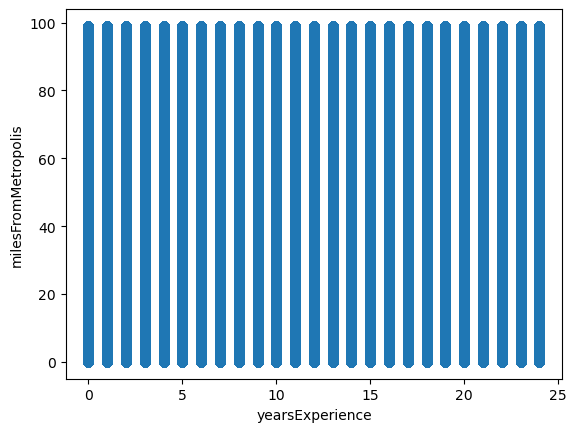

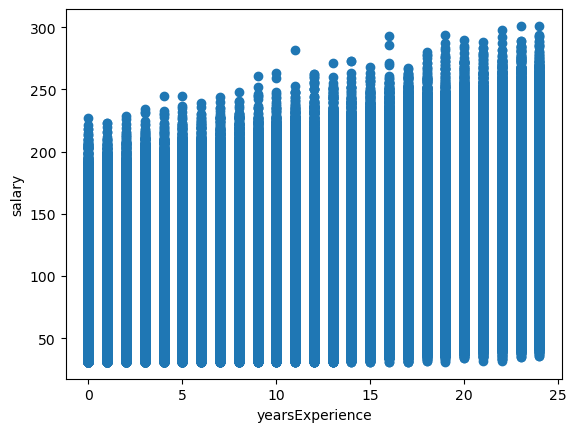

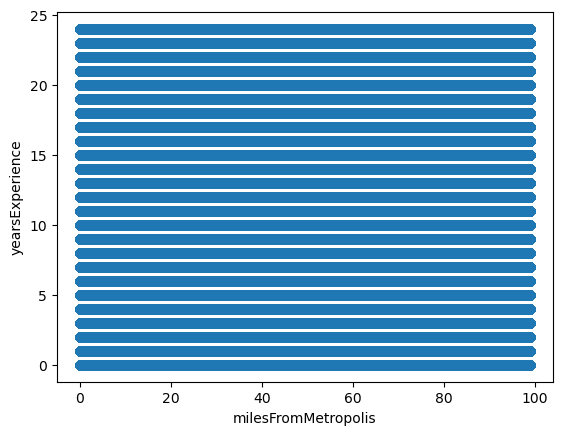

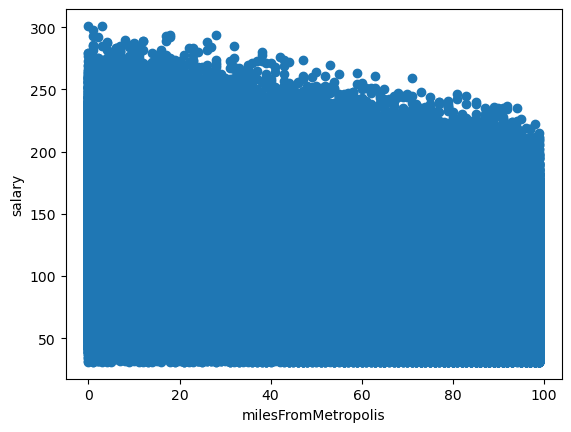

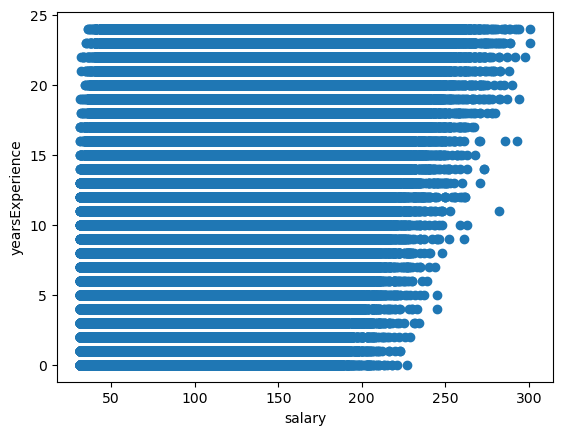

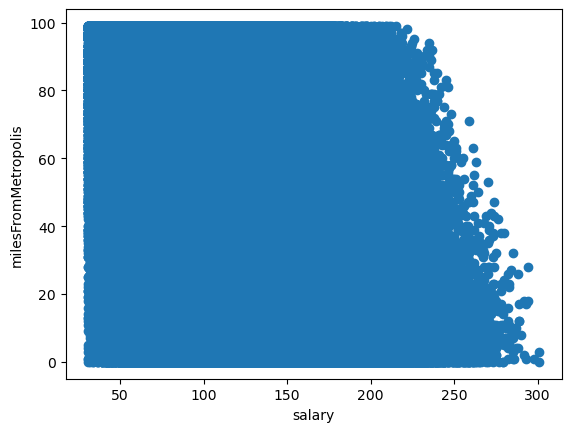

In [27]:
def plot_scatter(x, y):
    plt.scatter(train_data[x],train_data[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
for i in var_list:
    for j in var_list:
        if i != j:
            plot_scatter(i, j)

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

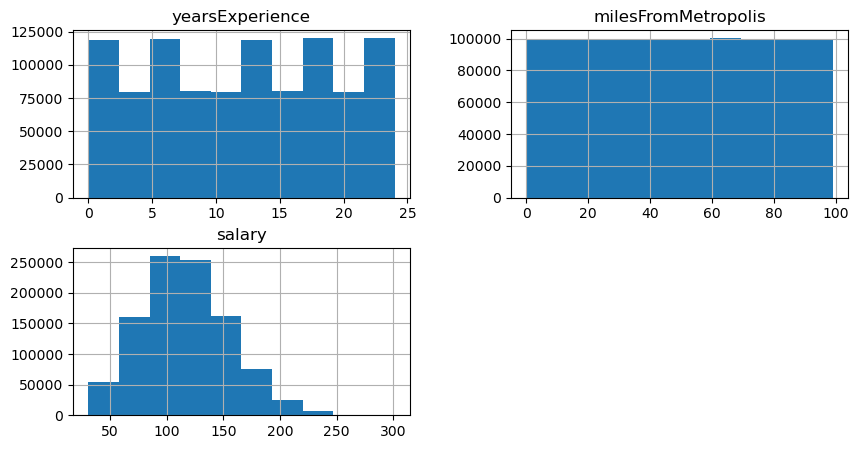

In [29]:
train_data.hist(figsize=(10,5))
plt.show()

From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


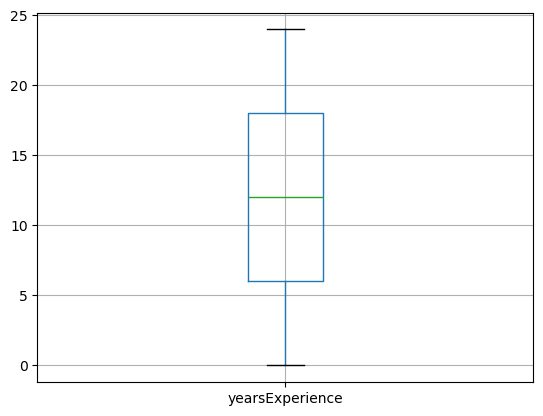

In [31]:
train_data.boxplot(column='yearsExperience')
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

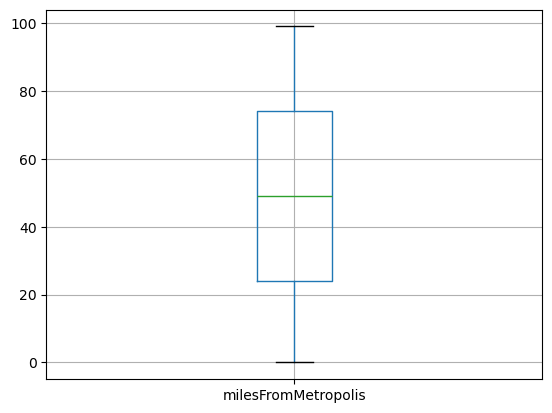

In [33]:
train_data.boxplot(column='milesFromMetropolis')
plt.show()


from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

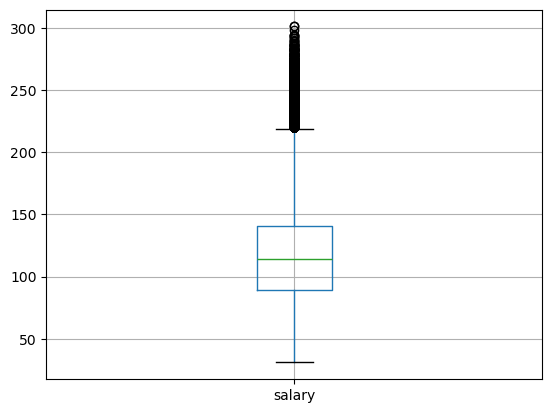

In [35]:
train_data.boxplot(column='salary')
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120

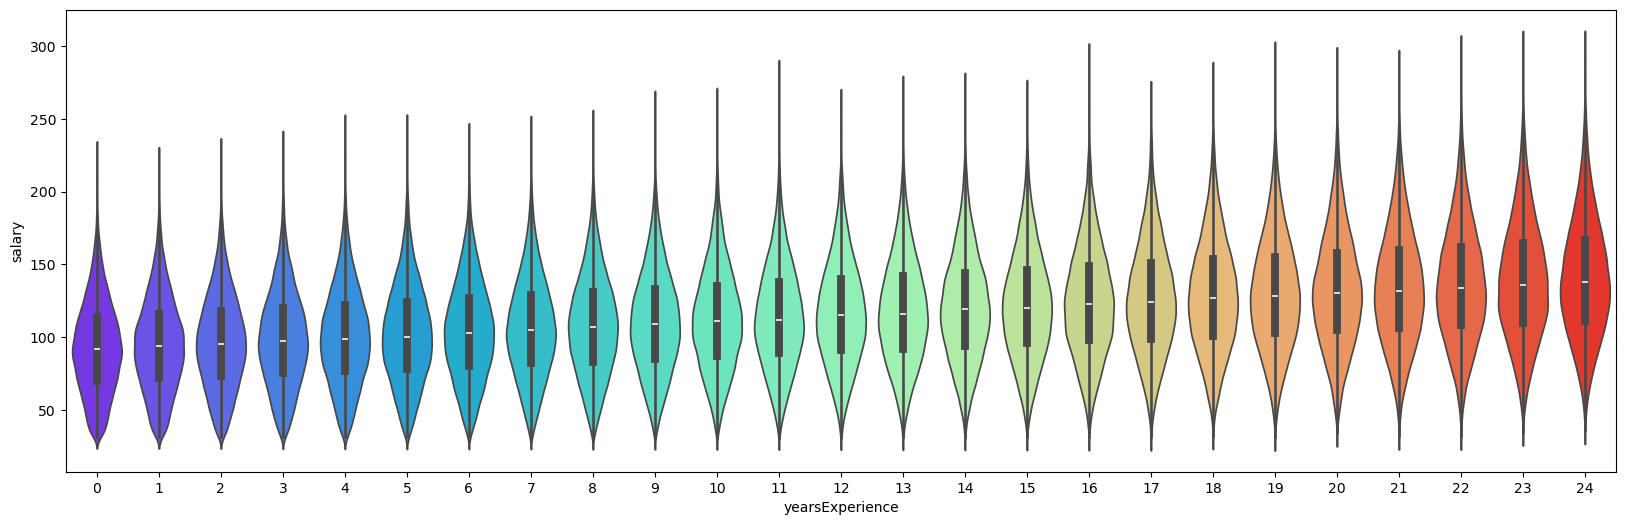

In [37]:
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')
plt.show()

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

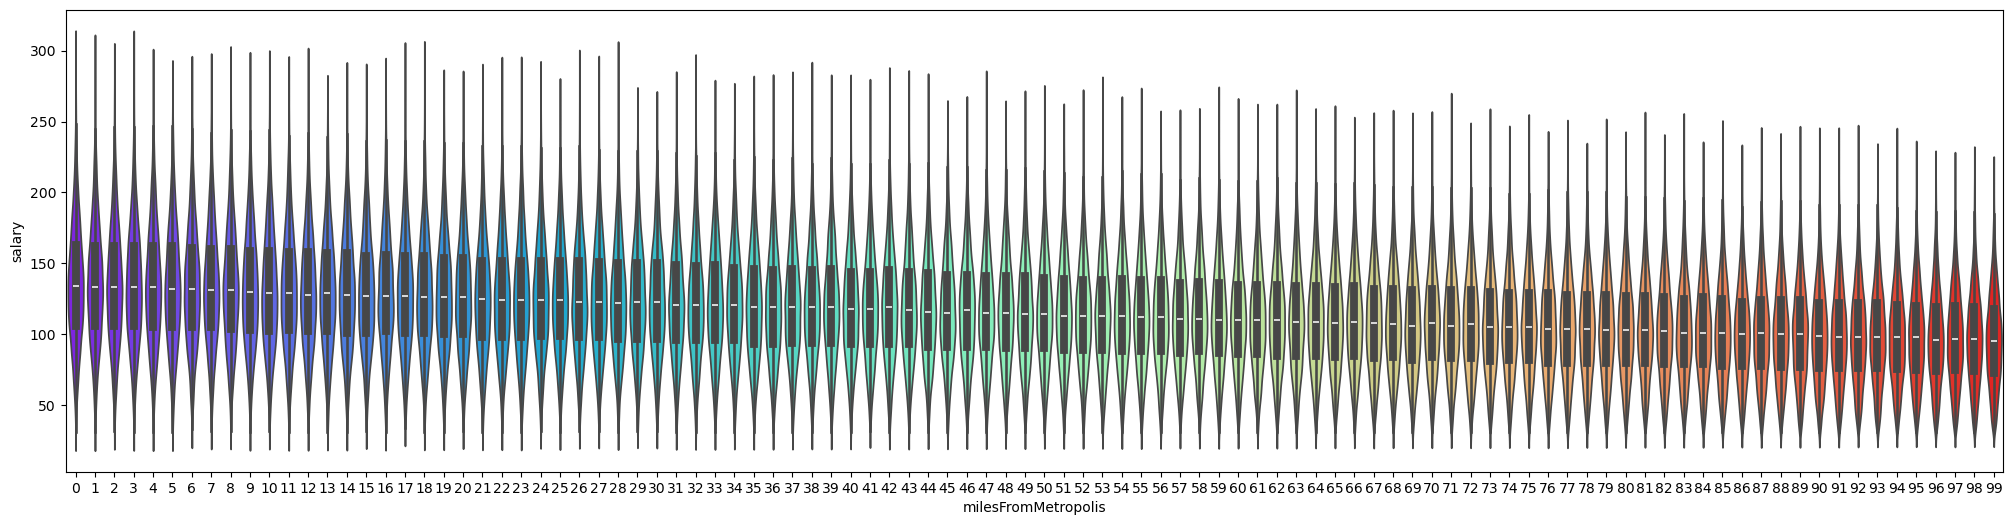

In [39]:
plt.figure(figsize=(25,6))
sns.violinplot(x='milesFromMetropolis',y='salary',data=train_data,palette='rainbow')
plt.show()


from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.
also there is higher observation probability at the between first quartile and third quartile.
The salary range is decreasing as we move right on the axis of milesFromMetropolis

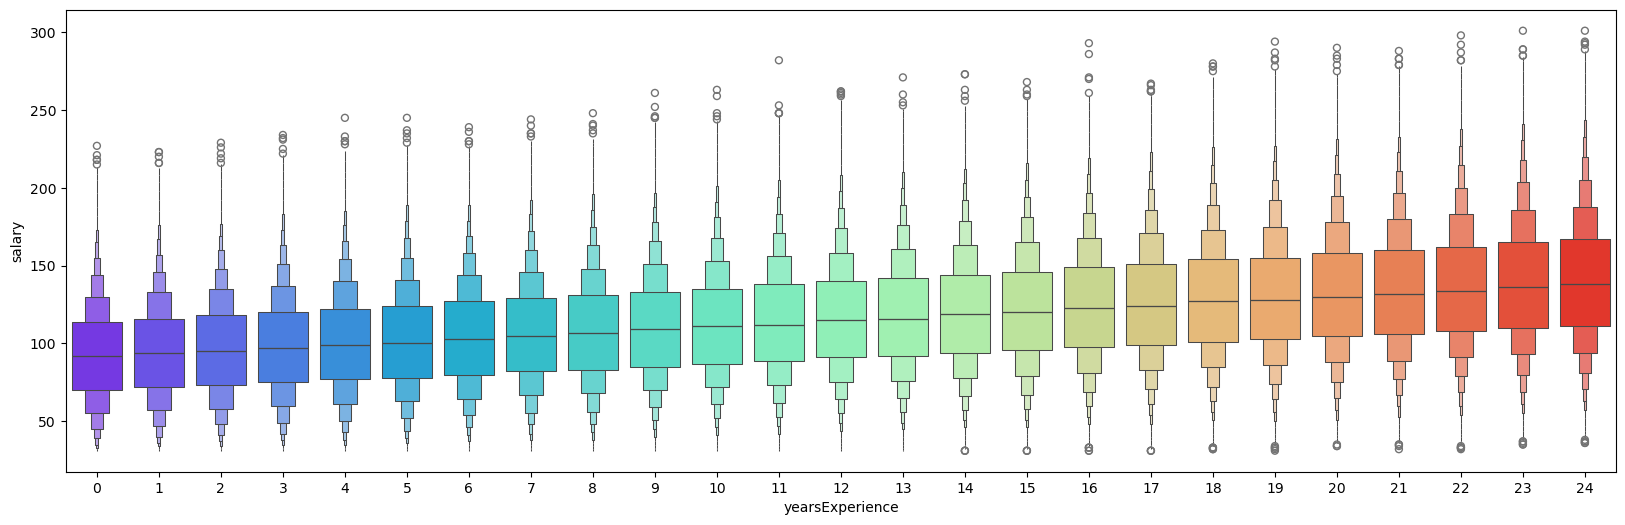

In [41]:
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')
plt.show()

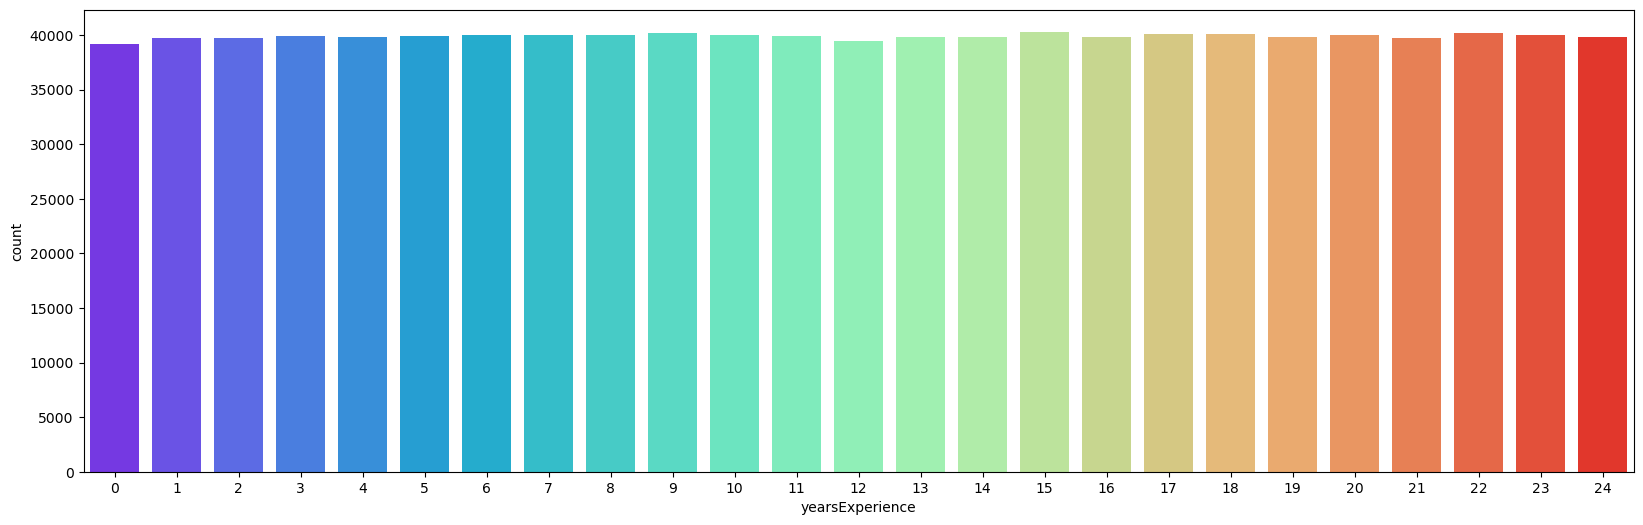

In [42]:
plt.figure(figsize=(20,6))
sns.countplot(x='yearsExperience',data=train_data,palette='rainbow')
plt.show()

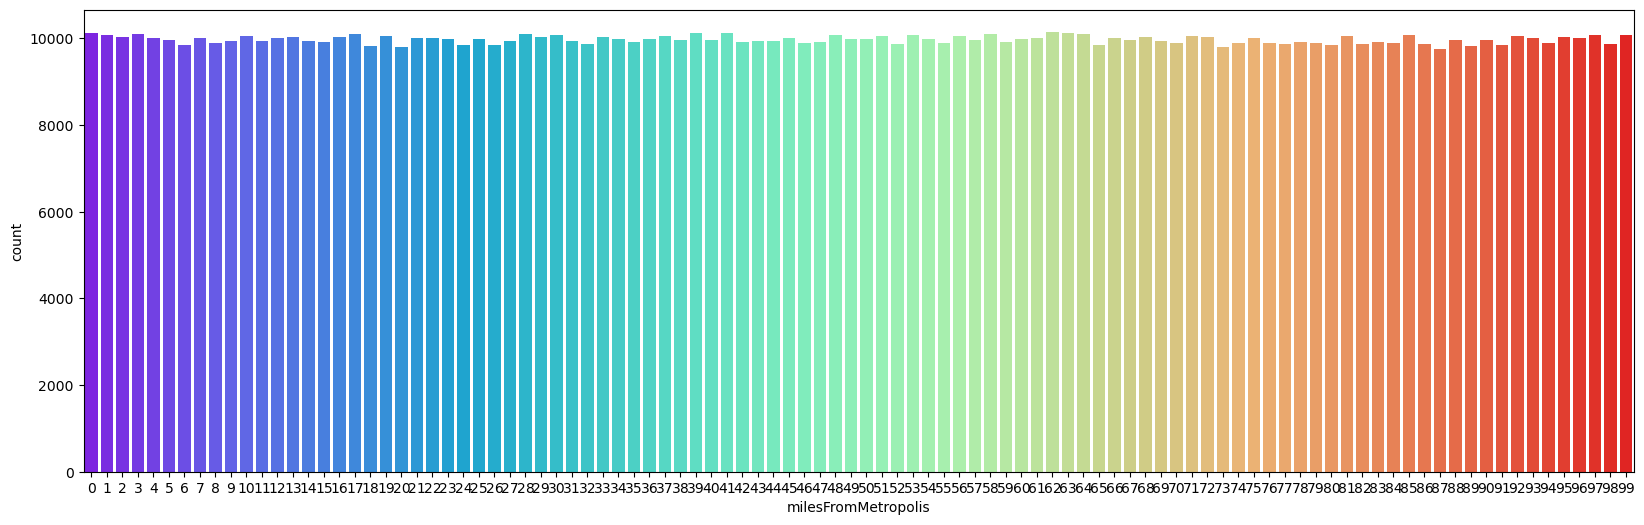

In [43]:
plt.figure(figsize=(20,6))
sns.countplot(x='milesFromMetropolis',data=train_data,palette='rainbow')
plt.show()


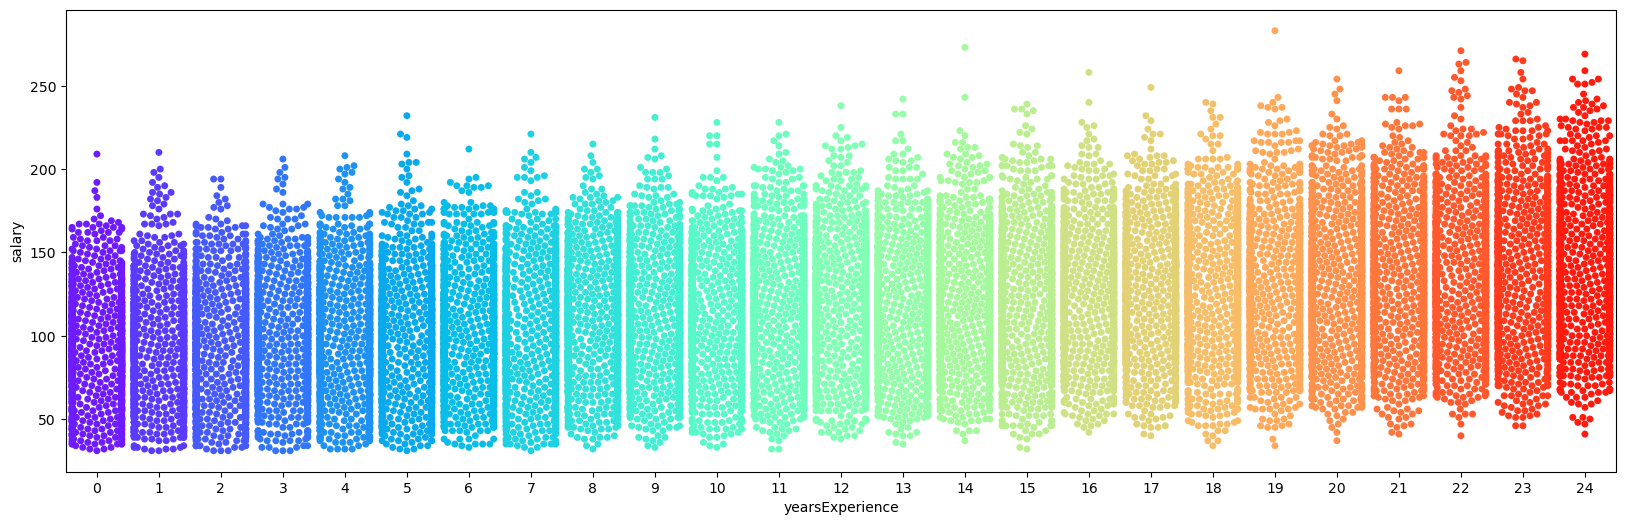

In [44]:
plt.figure(figsize=(20,6))
sns.swarmplot(x='yearsExperience',y='salary',data=train_data.iloc[:25000],palette='rainbow')
plt.show()

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

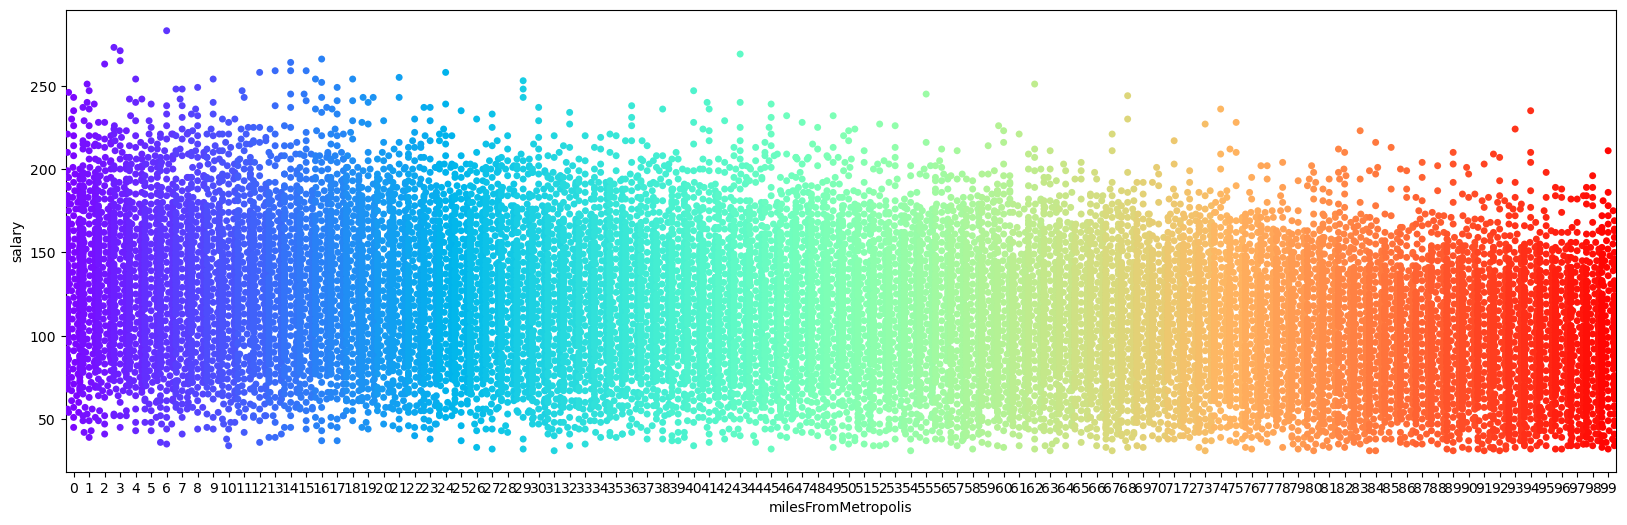

In [46]:
plt.figure(figsize=(20,6))
sns.swarmplot(x='milesFromMetropolis',y='salary',data=train_data.iloc[:25000],palette='rainbow')
plt.show()


from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

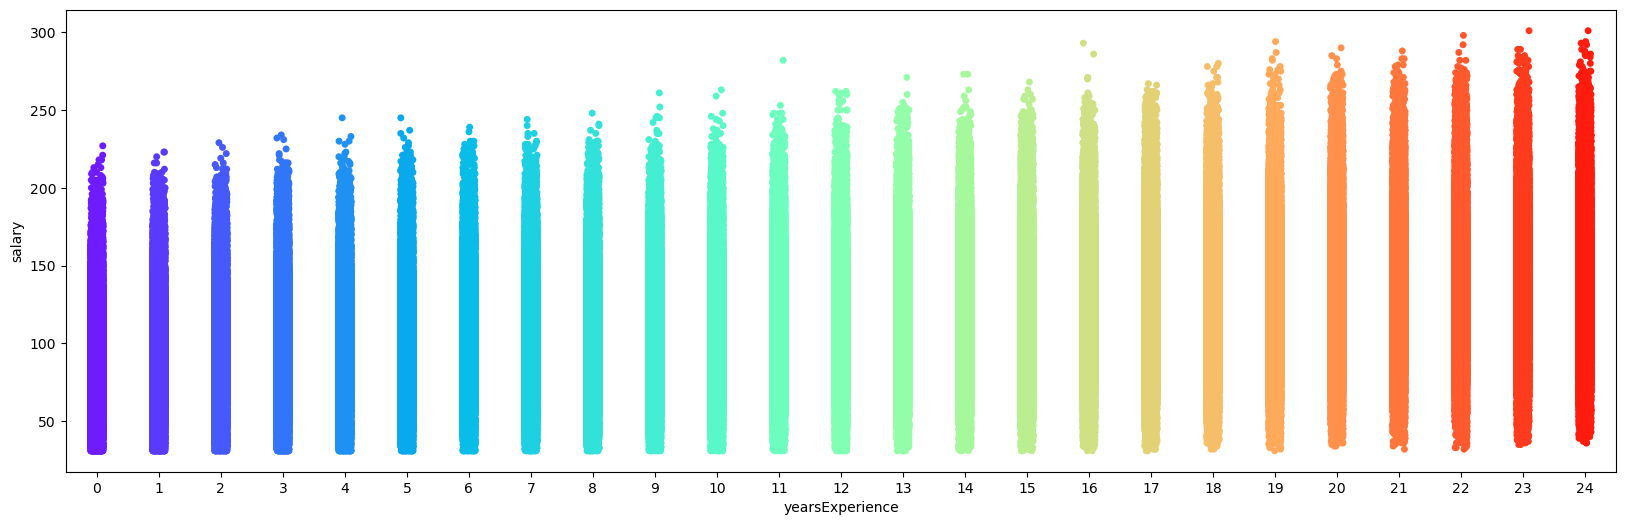

In [48]:
plt.figure(figsize=(20,6))
sns.stripplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')
plt.show()


from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

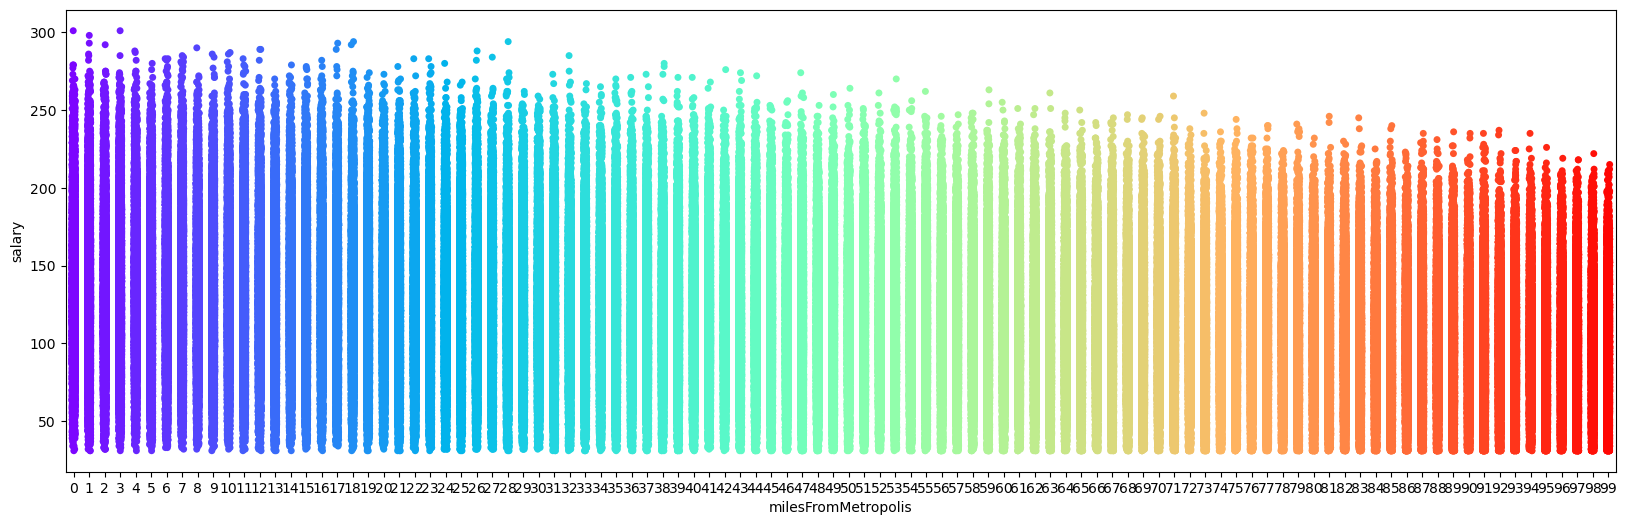

In [50]:
plt.figure(figsize=(20,6))
sns.stripplot(x='milesFromMetropolis',y='salary',data=train_data,palette='rainbow')
plt.show()


from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
train_for_vif =train_data[['yearsExperience','milesFromMetropolis']]
vif=pd.DataFrame()
vif['Variable']=train_for_vif.columns
vif['score']=[variance_inflation_factor(train_for_vif.values,i) for i in range(train_for_vif.shape[1])]
vif

,Variable,score
0,yearsExperience,2.222499
1,milesFromMetropolis,2.222499


Observations:

there is colinearity/multicolinearity between 
variables as the VIF value is almost upto 2.5

1. yearsExperience and milesFromMetropolis both have colinearity with all the variables.

### Manual Method to perform annova

In [55]:
def perform_anova_test(x, y, df):
    train_anova = df[[x, y]]
    groups = train_anova.groupby(x).mean()
    print(groups)
    unique_groups = train_anova[x].unique()
    for group in unique_groups:
        stats.probplot(train_anova[train_anova[x] == group][y], dist="norm", plot=plt)
        plt.title("Probability Plot - " +  str(group))
        plt.show()
    ratio = train_anova.groupby(x).std()[y].max() / train_anova.groupby(x).std()[y].min()
    print("Ratio of largest to smallest sample standard deviation:", ratio)
    data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
    anova_table = pd.DataFrame(data, columns=['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'])    
    anova_table.set_index('Source of Variation', inplace=True)
    x_bar = train_anova[y].mean()
    SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
    anova_table['SS']['Between Groups'] = SSTR[y].sum()
    SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
    anova_table['SS']['Within Groups'] = SSE[y].sum()
    SST = anova_table['SS']['Between Groups'] + anova_table['SS']['Within Groups']
    anova_table['SS']['Total'] = SST
    anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
    anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
    anova_table['df']['Total'] = train_anova.shape[0] - 1
    anova_table['MS'] = anova_table['SS'] / anova_table['df']
    F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
    anova_table['F']['Between Groups'] = F
    anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])
    alpha = 0.05
    anova_table['F crit']['Between Groups'] = stats.f.ppf(1 - alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])
    print(anova_table)
    print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis."
    if anova_table['P-value']['Between Groups'] <= alpha:
        conclusion = "Null Hypothesis is rejected."
    print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
    print(conclusion)
    print("\n--------------------------------------------------------------------------------------")
    print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis."
    if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
        conclusion = "Null Hypothesis is rejected."
    print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
    print(conclusion)


                 salary
major                  
BIOLOGY      127.932664
BUSINESS     135.648980
CHEMISTRY    129.072085
COMPSCI      132.075605
ENGINEERING  138.441342
LITERATURE   124.423097
MATH         133.322042
NONE         102.932128
PHYSICS      130.372436


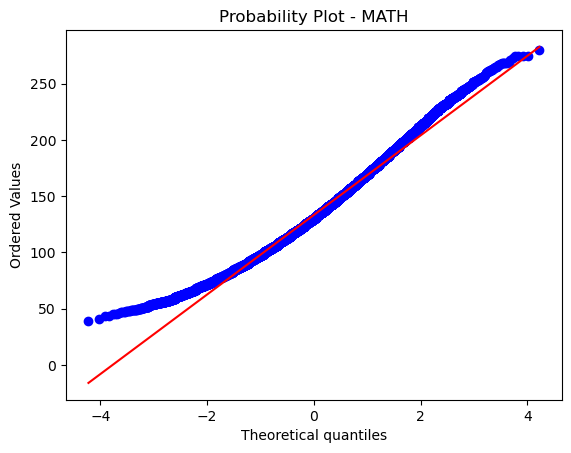

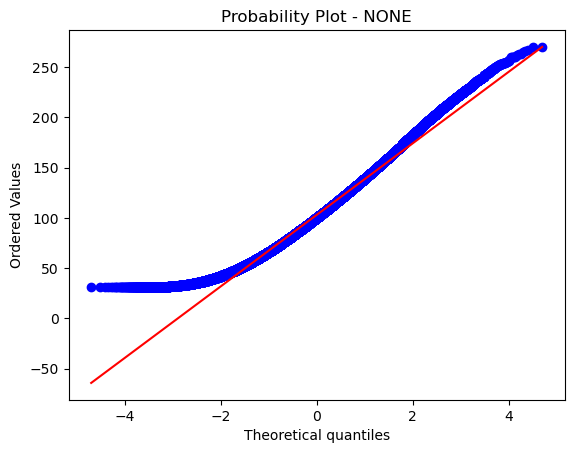

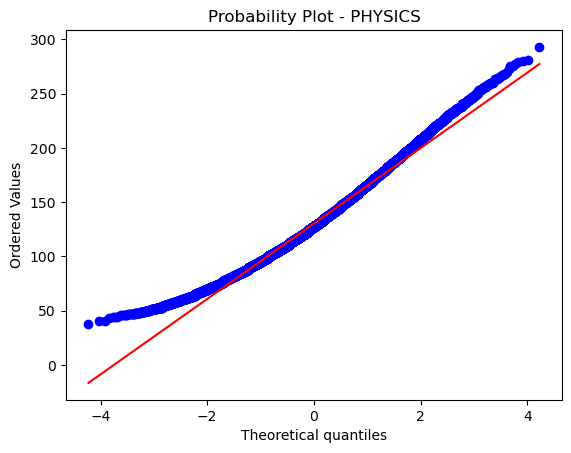

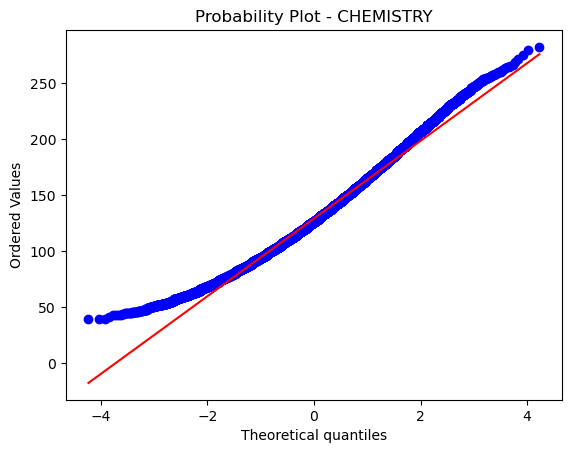

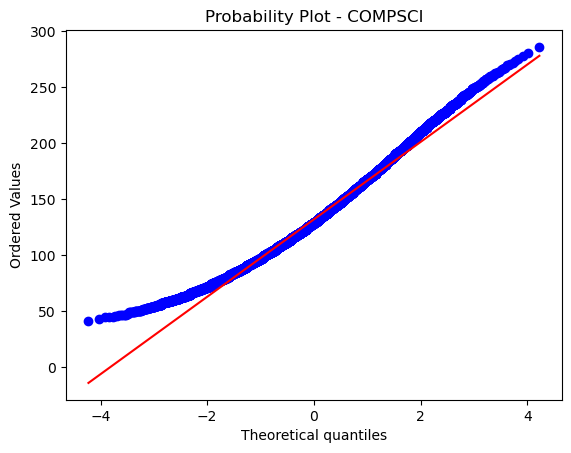

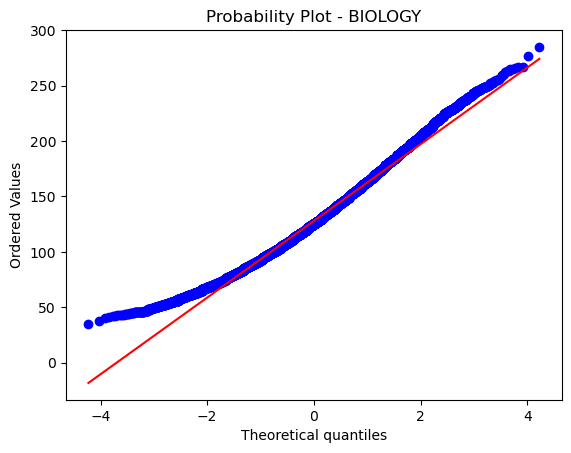

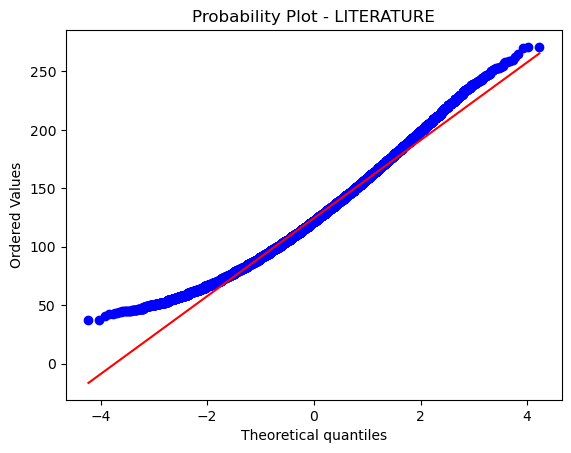

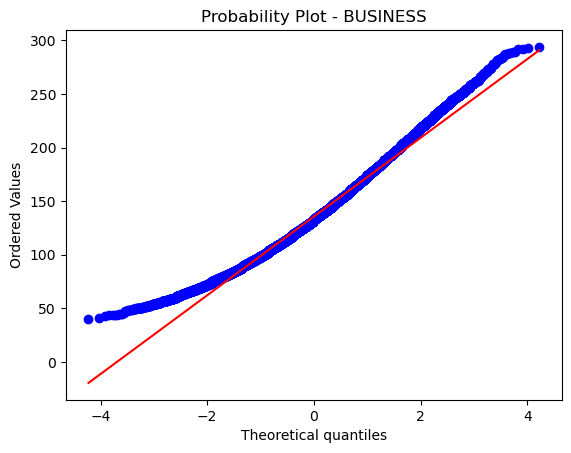

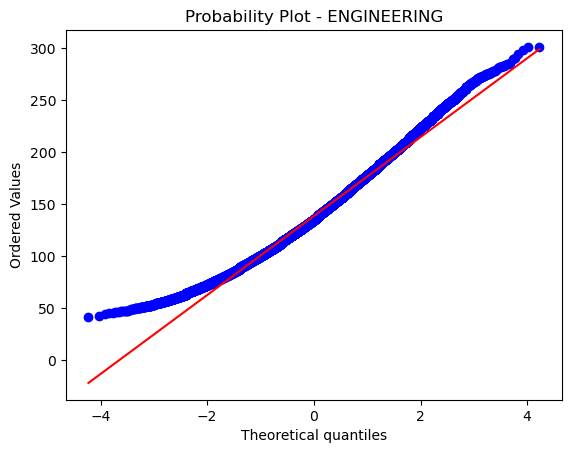

Ratio of largest to smallest sample standard deviation: 1.137076008144489
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        209547309.494914       8  26193413.686864  20572.997068   
Within Groups        1270060536.615651  997539      1273.193867                 
Total                1479607846.110565  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  1.938423  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 20572.997067846136  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis te

In [56]:
perform_anova_test('major','salary',train_data)


### By using libraries

In [58]:
def perform_anova_test_scipy(x, y, df):
    groups = df.groupby(x)[y].apply(list)
    f_statistic, p_value = stats.f_oneway(*groups)
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    alpha = 0.05
    if p_value <= alpha:
        print("Reject the null hypothesis. ")
    else:
        print("Fail to reject the null hypothesis.")

In [59]:
perform_anova_test_scipy('major','salary',train_data)

F-statistic: 20572.997067846147
P-value: 0.0
Reject the null hypothesis. 


In [60]:
perform_anova_test_scipy('jobType','salary',train_data)

F-statistic: 77349.96188255482
P-value: 0.0
Reject the null hypothesis. 


In [61]:
perform_anova_test_scipy('degree','salary',train_data)

F-statistic: 47107.26230562542
P-value: 0.0
Reject the null hypothesis. 


In [62]:
perform_anova_test_scipy('industry','salary',train_data)

F-statistic: 15497.252287484642
P-value: 0.0
Reject the null hypothesis. 


In [63]:
perform_anova_test_scipy('jobType','yearsExperience',train_data)

F-statistic: 7.262147745370661
P-value: 9.905482720802881e-09
Reject the null hypothesis. 


In [64]:
perform_anova_test_scipy('degree','yearsExperience',train_data)

F-statistic: 3.215029446606294
P-value: 0.011980261991278735
Reject the null hypothesis. 


In [65]:
perform_anova_test_scipy('major','yearsExperience',train_data)

F-statistic: 1.362696419150554
P-value: 0.20734047368605185
Fail to reject the null hypothesis.


In [66]:
perform_anova_test_scipy('industry','yearsExperience',train_data)

F-statistic: 5.434190877669929
P-value: 1.2491427772157917e-05
Reject the null hypothesis. 


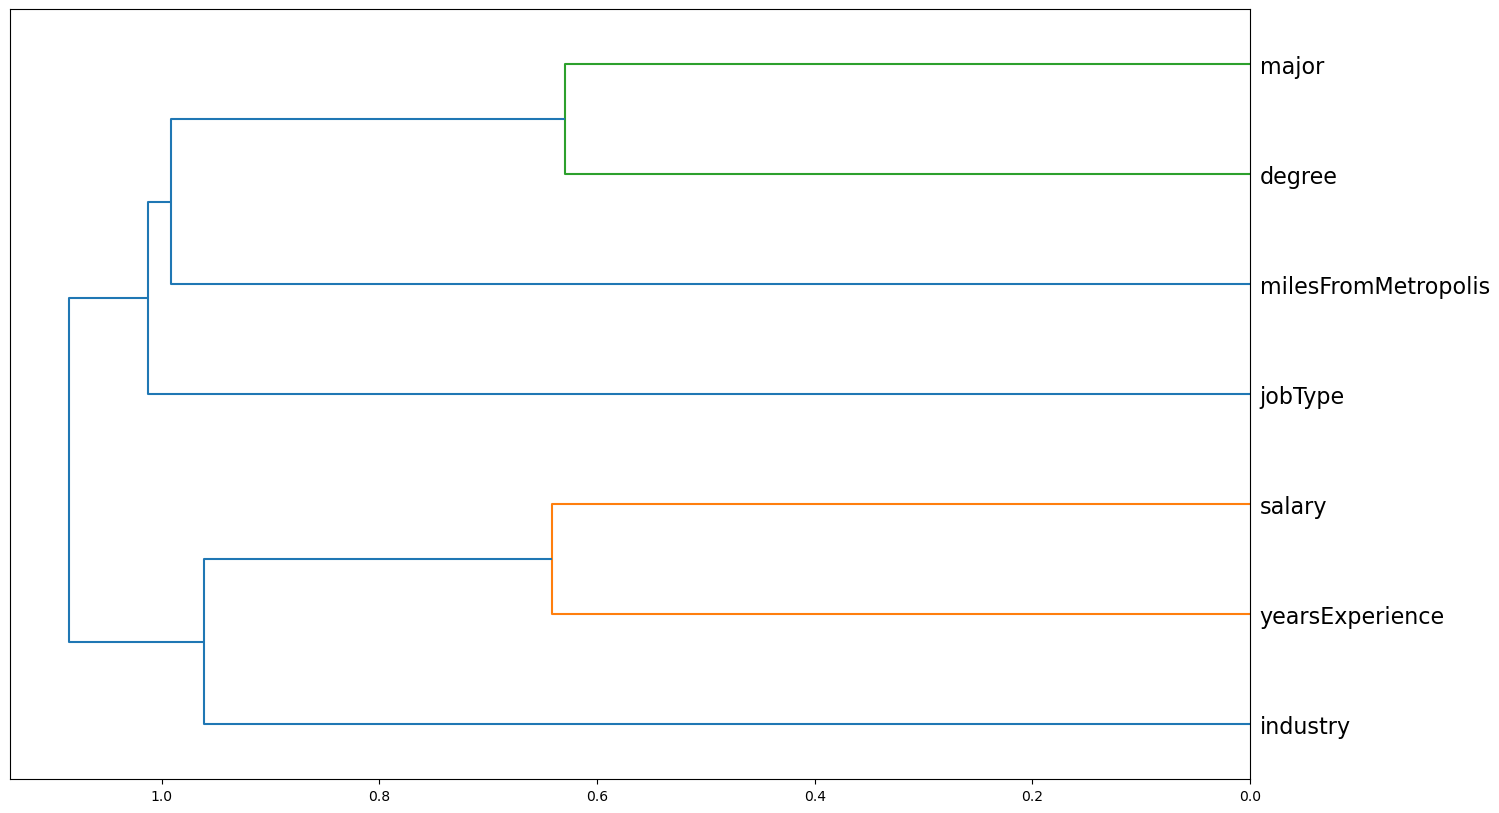

In [67]:
X = train_data[1:25000]
import scipy
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z,labels=X.columns,orientation='left',leaf_font_size=16)
plt.show()


observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

In [69]:
from sklearn.preprocessing import MinMaxScaler
def scale_data(df,col):
  scaler = MinMaxScaler()
  df[col] = scaler.fit_transform(df[col])
  return df

In [70]:
col_train = ['yearsExperience','milesFromMetropolis']
train_data = scale_data(train_data,col_train)


In [71]:
train_X = train_data.drop(['salary'],axis=1)
train_Y = train_data['salary']

In [72]:
train_X.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,CFO,MASTERS,MATH,HEALTH,0.416667,0.838384
1,CEO,HIGH_SCHOOL,NONE,WEB,0.125000,0.737374
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,0.416667,0.383838
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,0.333333,0.171717
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,0.333333,0.161616


In [73]:
train_Y.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [74]:
df=train_X[['yearsExperience','milesFromMetropolis']]
train_X=train_X.drop(['yearsExperience','milesFromMetropolis'],axis=1)
train_X = pd.get_dummies(train_X, drop_first=True)
encoded_columns = train_X.columns
train_X = train_X.astype(int)
train_X=pd.concat([df,train_X],axis=1)
train_X.head()

,yearsExperience,milesFromMetropolis,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,...,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,0.416667,0.838384,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0.125000,0.737374,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.416667,0.383838,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
3,0.333333,0.171717,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.333333,0.161616,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X,train_Y,test_size=0.2)

In [76]:
print(X_train.shape)
print(X_test.shape)
X_train.head()

(798038, 27)
(199510, 27)


,yearsExperience,milesFromMetropolis,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,...,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
310837,1.000000,0.020202,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
866370,0.041667,0.858586,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
959252,0.750000,0.606061,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
804513,0.500000,0.727273,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
158866,0.208333,0.060606,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [77]:
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score

def rmse(x, y):
    return np.sqrt(np.mean((x - y) ** 2))
def print_score(m):
    y_train_pred = m.predict(X_train)
    y_test_pred = m.predict(X_test)
    
    rmse_train = rmse(y_train, y_train_pred)
    rmse_test = rmse(y_test, y_test_pred)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    medae_train = median_absolute_error(y_train, y_train_pred)
    medae_test = median_absolute_error(y_test, y_test_pred)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    print("RMSE-Train: " + str(rmse_train))
    print("RMSE-Test: " + str(rmse_test))
    print("Score-Train: " + str(r2_train))
    print("Score-Test: " + str(r2_test))
    print("MedAE-Train: " + str(medae_train))
    print("MedAE-Test: " + str(medae_test))
    print("MeanAE-Train: " + str(mae_train))
    print("MeanAE-Test: " + str(mae_test), '\n')

In [78]:
def visualize_importance(feature_importances, feat_train_df):
    feature_importance_df = pd.DataFrame({
        'feature_importance': feature_importances,
        'column': feat_train_df.columns
    })

    aggregated_importance = feature_importance_df.groupby('column').sum()
    order = aggregated_importance.sort_values('feature_importance', ascending=False).index[:50]

    fig, ax = plt.subplots(figsize=(10, min(8, len(order) * .25)))
    sns.boxplot(data=feature_importance_df,
                x='feature_importance',
                y='column',
                order=order,
                ax=ax,
                palette='viridis',
                orient='h')
    ax.tick_params(axis='x', rotation=0)
    ax.set_title('Feature Importance')
    ax.grid(True)
    fig.tight_layout()
    
    return fig, ax


RMSE-Train: 19.623837453547832
RMSE-Test: 19.639432519045805
Score-Train: 0.740594829431175
Score-Test: 0.7390508310833304
MedAE-Train: 13.762460870579737
MedAE-Test: 13.776982527058628
MeanAE-Train: 15.86785851337813
MeanAE-Test: 15.879363576952965 



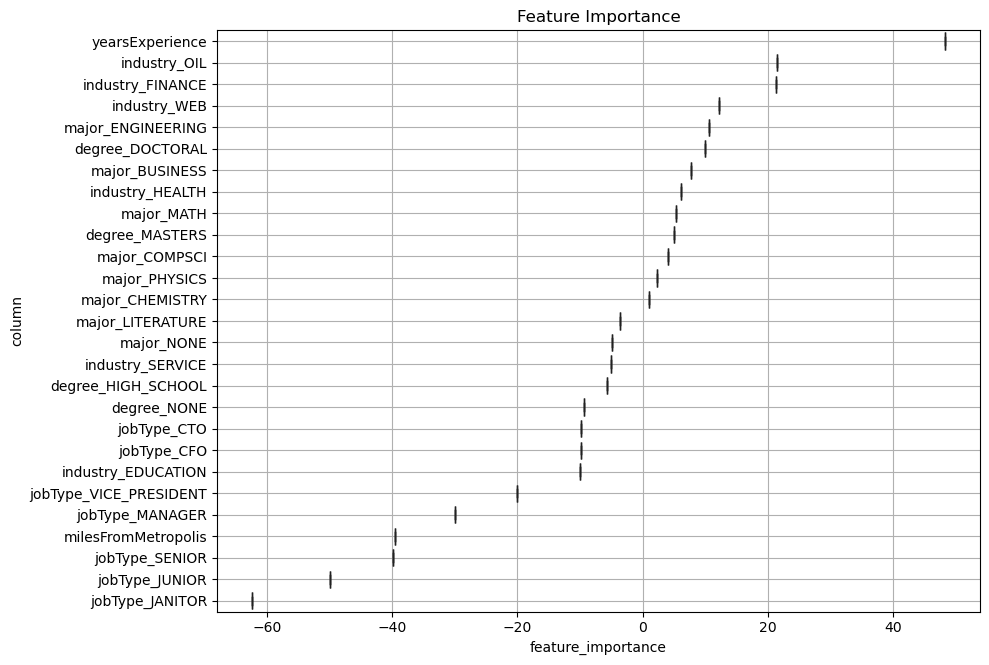

In [79]:
from sklearn.linear_model import LinearRegression
lModel=LinearRegression()
lModel.fit(X_train,y_train)
print_score(lModel)
fig,ax=visualize_importance(lModel.coef_,train_X)

RMSE-Train: 20.20838987640634
RMSE-Test: 20.796907311096938
Score-Train: 0.7249103969368554
Score-Test: 0.7073856899595308
MedAE-Train: 13.120000000000005
MedAE-Test: 14.009999999999991
MeanAE-Train: 15.9156328166853
MeanAE-Test: 16.586568017975207 



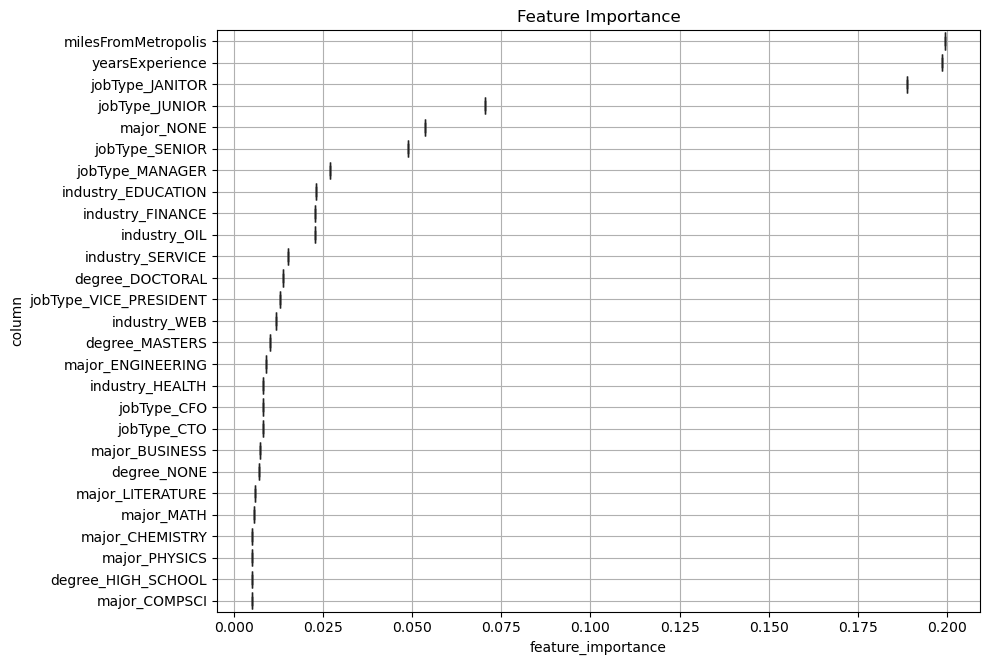

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train.iloc[1:50000],y_train.iloc[1:50000])
print_score(rf)
fig,ax=visualize_importance(rf.feature_importances_,train_X.iloc[1:50000])

In [81]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train.iloc[1:10000],y_train.iloc[1:10000])
print_score(knn)

RMSE-Train: 23.94813154598169
RMSE-Test: 24.036305447175057
Score-Train: 0.613673924209364
Score-Test: 0.6091289754423312
MedAE-Train: 15.200000000000003
MedAE-Test: 15.200000000000003
MeanAE-Train: 18.676556755442718
MeanAE-Test: 18.73951982356774 



RMSE-Train: 19.930642371812443
RMSE-Test: 19.959905246084446
Score-Train: 0.7324201873338503
Score-Test: 0.7304651046251233
MedAE-Train: 13.785955369974673
MedAE-Test: 13.794887596223049
MeanAE-Train: 15.988213441095704
MeanAE-Test: 16.014677034974405 



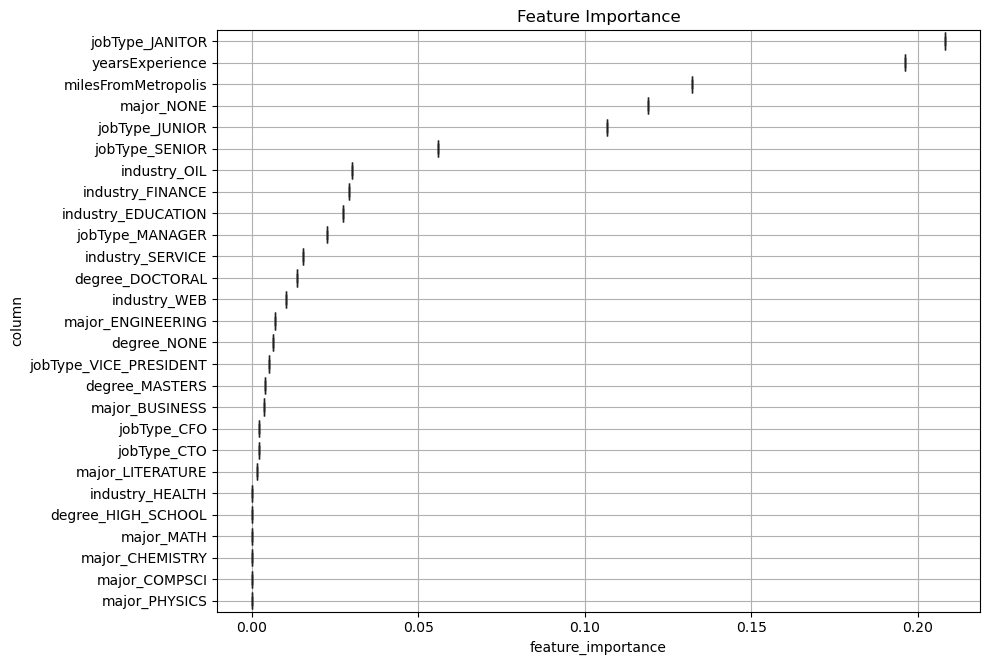

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train.iloc[1:50000],y_train.iloc[1:50000])
print_score(gbr)
fig,ax=visualize_importance(gbr.feature_importances_,train_X.iloc[1:50000])

In [83]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(X_train.iloc[1:50000],y_train.iloc[1:50000])
print_score(dtree)

RMSE-Train: 27.04363257198771
RMSE-Test: 27.974005441572828
Score-Train: 0.5073473694268136
Score-Test: 0.4705714484340411
MedAE-Train: 16.0
MedAE-Test: 18.0
MeanAE-Train: 20.415897801859053
MeanAE-Test: 21.770321871919535 



RMSE-Train: 27.39599994134667
RMSE-Test: 27.394963451600898
Score-Train: 0.49442561088016634
Score-Test: 0.4922621971362534
MedAE-Train: 21.418380285572525
MedAE-Test: 21.435978004713263
MeanAE-Train: 22.970865126595815
MeanAE-Test: 22.974160256486392 



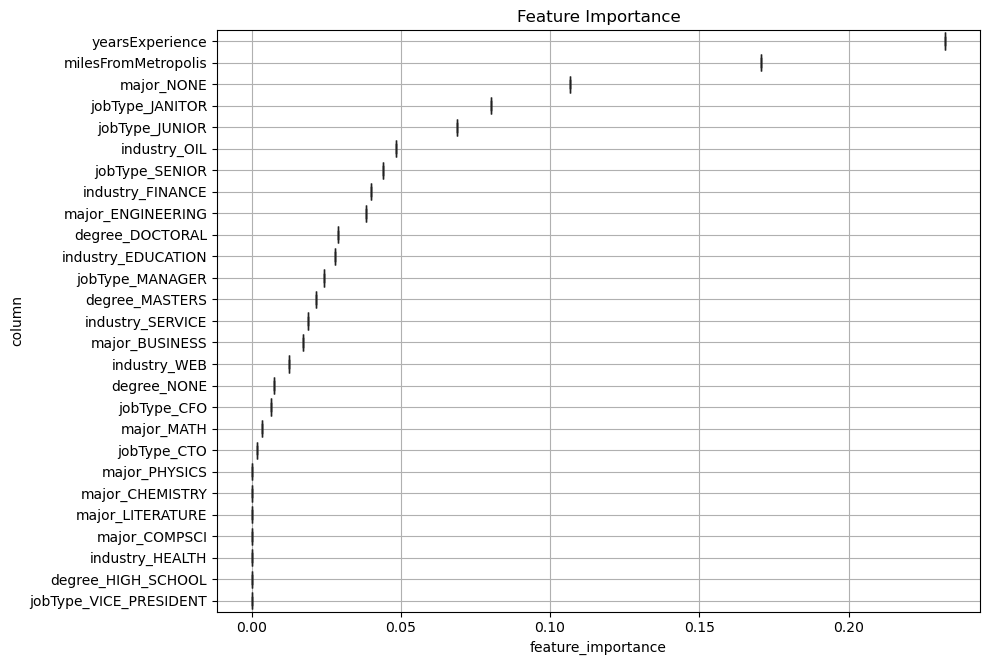

In [84]:
from sklearn.ensemble import AdaBoostRegressor
AdaBoost=AdaBoostRegressor()
AdaBoost.fit(X_train.iloc[1:50000],y_train.iloc[1:50000])
print_score(AdaBoost)
fig,ax=visualize_importance(AdaBoost.feature_importances_,train_X.iloc[1:50000])

In [85]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
def compare_models(models,names,X_train,y_train,X_test,y_test):


    # now, create a list with the objects 
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x,y):
      return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
      y_pred= model.predict(X_test) # then predict on the test set
      res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
                metrics.median_absolute_error(model.predict(X_train), y_train),metrics.median_absolute_error(model.predict(X_test), y_test),
                metrics.mean_absolute_error(model.predict(X_train), y_train),metrics.mean_absolute_error(model.predict(X_test), y_test),
                metrics.r2_score(model.predict(X_train), y_train),metrics.r2_score(model.predict(X_test), y_test)]
      df_train[name] = [res[0], res[2], res[4], res[6]]
      df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train,df_test

In [86]:
models= [lModel,dtree,rf,knn,gbr,AdaBoost]
names = ['Lr', 'Dtree', 'Forest', 'Knn','GBR','AdaBoost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,y_train,X_test,y_test)

In [87]:
print(comp_model_train[:1])
print('\n')
print(comp_model_test[:1])

  Metric         Lr      Dtree    Forest        Knn        GBR  AdaBoost
0   rmse  19.623837  27.043633  20.20839  23.948132  19.930642    27.396


  Metric         Lr      Dtree     Forest        Knn        GBR   AdaBoost
0   rmse  19.639433  27.974005  20.796907  24.036305  19.959905  27.394963


In [88]:
print("result on test_data")
comp_model_test

result on test_data


,Metric,Lr,Dtree,Forest,Knn,GBR,AdaBoost
0,rmse,19.639433,27.974005,20.796907,24.036305,19.959905,27.394963
1,MedAE,13.776983,18.000000,14.010000,15.200000,13.794888,21.435978
2,MAE,15.879364,21.770322,16.586568,18.739520,16.014677,22.974160
3,R-squared,0.648456,0.481016,0.623094,0.424581,0.565705,-0.121052


In [89]:
def random_Search(model,X_train, y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV
  random = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=3,verbose=2,random_state=42,n_jobs=-1)
  random.fit(X_train.iloc[1:25000],y_train.iloc[1:25000])
  print(random.best_params_)


In [90]:
rf_para_grid = {
    'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': list(range(1, 33)),
    'min_samples_leaf': [int(x) for x in np.linspace(1, 10, 5)],
    'bootstrap': [True, False]
}
random_Search(RandomForestRegressor(),X_train,y_train,param_grid=rf_para_grid)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 100, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 26, 'bootstrap': False}


In [91]:
from sklearn.ensemble import GradientBoostingRegressor

GBR_para_grid = {
    'n_estimators':  [1, 2, 4, 8, 16, 32, 64, 100, 200], 
    'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
    'max_depth': list(range(1, 33)),
    'min_samples_split': [int(x) for x in np.linspace(2, 20, 10, endpoint=True)]  
}

random_Search(GradientBoostingRegressor(),X_train,y_train,param_grid=GBR_para_grid)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_split': 2, 'max_depth': 8, 'learning_rate': 0.25}


In [92]:
DTR_para_grid = {
    "splitter": ["best", "random"],
    "max_depth": list(range(1, 33)),  
    "min_samples_leaf": np.linspace(0.1, 0.5, 5, endpoint=True).tolist(),  
    "min_weight_fraction_leaf": [0.1, 0.2, 0.5, 0.9],
    "max_features": ["auto", "log2", "sqrt", None]
}
random_Search(DecisionTreeRegressor(),X_train,y_train,param_grid=DTR_para_grid)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 20}


In [93]:
rf=RandomForestRegressor(**{'n_estimators': 100, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 26, 'bootstrap': False}
)
rf.fit(X_train.iloc[1:50000],y_train.iloc[1:50000])
print_score(rf)

RMSE-Train: 19.67946742643741
RMSE-Test: 20.037750125062903
Score-Train: 0.7391220128288831
Score-Test: 0.728358598964398
MedAE-Train: 13.418767514149991
MedAE-Test: 13.793706845115352
MeanAE-Train: 15.740261401523904
MeanAE-Test: 16.08444016485816 



In [94]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(**{'n_estimators': 64, 'min_samples_split': 2, 'max_depth': 8, 'learning_rate': 0.25}
)
gbr.fit(X_train.iloc[1:50000],y_train.iloc[1:50000])
print_score(gbr)


RMSE-Train: 19.510061852822258
RMSE-Test: 19.74317121107625
Score-Train: 0.7435940818169957
Score-Test: 0.7362867979664656
MedAE-Train: 13.406123378400451
MedAE-Test: 13.681752482509253
MeanAE-Train: 15.676052283044712
MeanAE-Test: 15.88926578646011 



In [95]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(**{'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 5}
)
dtree.fit(X_train.iloc[1:50000],y_train.iloc[1:50000])
print_score(dtree)

RMSE-Train: 35.689674583432655
RMSE-Test: 35.65170951001236
Score-Train: 0.14198292868936557
Score-Test: 0.14007857987520989
MedAE-Train: 24.70532686612009
MedAE-Test: 24.53012290953052
MeanAE-Train: 28.67965121117802
MeanAE-Test: 28.624464089514213 



In [96]:
models= [rf,gbr,dtree]
names = ['Forest','GBR','DTree']
comp_model_train,comp_model_test = compare_models(models,names,X_train,y_train,X_test,y_test)


In [97]:
print("Metrics on train data")
comp_model_train

Metrics on train data


,Metric,Forest,GBR,DTree
0,rmse,19.679467,19.510062,35.689675
1,MedAE,13.418768,13.406123,24.705327
2,MAE,15.740261,15.676052,28.679651
3,R-squared,0.624936,0.670339,-5.034821


In [98]:
print("Metrics on test data")
comp_model_test

Metrics on test data


,Metric,Forest,GBR,DTree
0,rmse,20.037750,19.743171,35.651710
1,MedAE,13.793707,13.681752,24.530123
2,MAE,16.084440,15.889266,28.624464
3,R-squared,0.607742,0.660818,-5.026801


In [99]:
test_X1= test_data
test_X1.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [100]:
col_test = ['yearsExperience','milesFromMetropolis']
test_X1 = scale_data(test_X1,col_train)

In [101]:
test_X1.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,0.916667,0.737374
1,JUNIOR,NONE,NONE,AUTO,0.833333,0.474747
2,CTO,MASTERS,BIOLOGY,HEALTH,0.708333,0.090909
3,MANAGER,HIGH_SCHOOL,NONE,OIL,0.583333,0.969697
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,0.416667,0.444444


In [102]:
df1=test_X1[['yearsExperience','milesFromMetropolis']]
test_X1=test_X1.drop(['yearsExperience','milesFromMetropolis'],axis=1)
test_X1=pd.get_dummies(test_X1,drop_first=True)
encoded_columns = test_X1.columns
test_X1=test_X1.astype(int)
test_X1=pd.concat([df,test_X1],axis=1)
test_X1.head()

,yearsExperience,milesFromMetropolis,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,...,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,0.416667,0.838384,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.125000,0.737374,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.416667,0.383838,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.333333,0.171717,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.333333,0.161616,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [103]:
test_X1.isnull().sum()

yearsExperience           2452
milesFromMetropolis       2452
jobType_CFO                  0
jobType_CTO                  0
jobType_JANITOR              0
jobType_JUNIOR               0
jobType_MANAGER              0
jobType_SENIOR               0
jobType_VICE_PRESIDENT       0
degree_DOCTORAL              0
degree_HIGH_SCHOOL           0
degree_MASTERS               0
degree_NONE                  0
major_BUSINESS               0
major_CHEMISTRY              0
major_COMPSCI                0
major_ENGINEERING            0
major_LITERATURE             0
major_MATH                   0
major_NONE                   0
major_PHYSICS                0
industry_EDUCATION           0
industry_FINANCE             0
industry_HEALTH              0
industry_OIL                 0
industry_SERVICE             0
industry_WEB                 0
dtype: int64

In [104]:
test_X1 = test_X1.dropna()
test_X1.isnull().sum()

yearsExperience           0
milesFromMetropolis       0
jobType_CFO               0
jobType_CTO               0
jobType_JANITOR           0
jobType_JUNIOR            0
jobType_MANAGER           0
jobType_SENIOR            0
jobType_VICE_PRESIDENT    0
degree_DOCTORAL           0
degree_HIGH_SCHOOL        0
degree_MASTERS            0
degree_NONE               0
major_BUSINESS            0
major_CHEMISTRY           0
major_COMPSCI             0
major_ENGINEERING         0
major_LITERATURE          0
major_MATH                0
major_NONE                0
major_PHYSICS             0
industry_EDUCATION        0
industry_FINANCE          0
industry_HEALTH           0
industry_OIL              0
industry_SERVICE          0
industry_WEB              0
dtype: int64

In [105]:
y_predict=gbr.predict(test_X1)
y_predict

array([ 84.44275634,  59.52713967, 146.96941798, ...,  74.33374062,
       167.35853354, 121.46363195])

In [106]:
y_predict=pd.DataFrame(y_predict)
y_predict

,0
0,84.442756
1,59.527140
2,146.969418
3,123.430907
4,116.586459
...,...
997543,120.092909
997544,109.650994
997545,74.333741
997546,167.358534


In [107]:
sample=train_data.sample(100)
sample

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
494047,CTO,HIGH_SCHOOL,NONE,SERVICE,0.291667,0.222222,123
22889,JUNIOR,BACHELORS,COMPSCI,OIL,0.750000,0.858586,80
487119,JUNIOR,MASTERS,COMPSCI,AUTO,0.833333,0.444444,121
797964,JUNIOR,DOCTORAL,CHEMISTRY,OIL,1.000000,0.373737,167
514494,JUNIOR,MASTERS,MATH,WEB,0.583333,0.202020,122
...,...,...,...,...,...,...,...
19036,CTO,DOCTORAL,ENGINEERING,OIL,0.583333,0.353535,141
217952,JUNIOR,DOCTORAL,LITERATURE,EDUCATION,0.583333,0.323232,128
69959,CFO,MASTERS,BUSINESS,SERVICE,0.750000,0.494949,167
94300,CTO,HIGH_SCHOOL,NONE,EDUCATION,0.875000,0.696970,125


In [108]:
train_cat = sample.iloc[:, 0:4]  # Categorical variables for sample
train_X_encoded = pd.get_dummies(train_cat, drop_first=True)
train_X_encoded = train_X_encoded.astype(int)
train = pd.concat([ sample.iloc[:, 4:],train_X_encoded], axis=1)
sample_filtered = train[train['salary'] < 60]
x_sample = sample_filtered.drop('salary', axis=1)
y_sample = sample_filtered['salary']
col_test = ['yearsExperience','milesFromMetropolis']
sample_x = scale_data(x_sample,col_test)
sample_x

,yearsExperience,milesFromMetropolis,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,...,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
73594,0.25,0.726027,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
703772,0.00,0.383562,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
747507,0.25,0.000000,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
19792,0.00,0.876712,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
545957,1.00,1.000000,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
803675,0.05,0.794521,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [109]:
predicted_out = gbr.predict(sample_x)
predicted_out

array([37.86477533, 38.02749323, 67.14413577, 38.89112407, 60.9424847 ,
       45.30628311])

In [110]:
y_sample

73594     39
703772    42
747507    55
19792     41
545957    50
803675    40
Name: salary, dtype: int64

In [111]:
result = pd.DataFrame({'actual': y_sample, 'expected': predicted_out})
result

,actual,expected
73594,39,37.864775
703772,42,38.027493
747507,55,67.144136
19792,41,38.891124
545957,50,60.942485
803675,40,45.306283


## **`QUESTION`**:

**Mr. Pandey provides the detail of a new hired employee and asks us to predict a range of salary which the company can offer to that employee:**

**job_type** = CTO

**degree** = Masters

**major** = Biology

**industry** = Health

**experience** = 17

miles from **metropolis** = 9

In [113]:
new_employee = {
    'jobType_CTO': 1, 'jobType_CFO': 0, 'jobType_JANITOR': 0, 'jobType_JUNIOR': 0,
    'jobType_MANAGER': 0, 'jobType_SENIOR': 0, 'jobType_VICE_PRESIDENT': 0,
    'degree_MASTERS': 1, 'degree_DOCTORAL': 0, 'degree_HIGH_SCHOOL': 0,
    'degree_NONE': 0, 'major_BUSINESS': 0, 'major_CHEMISTRY': 0, 'major_COMPSCI': 0,
    'major_ENGINEERING': 0, 'major_LITERATURE': 0, 'major_MATH': 0, 'major_NONE': 0,
    'major_PHYSICS': 0, 'major_BIOLOGY': 1, 'industry_EDUCATION': 0,
    'industry_FINANCE': 0, 'industry_HEALTH': 1, 'industry_OIL': 0,
    'industry_SERVICE': 0, 'industry_WEB': 0, 'yearsExperience': 17,
    'milesFromMetropolis': 9
}
new_employee_df = pd.DataFrame([new_employee])
new_column_order = ['yearsExperience', 'milesFromMetropolis', 
                    'jobType_CFO', 'jobType_CTO', 'jobType_JANITOR', 'jobType_JUNIOR',
                    'jobType_MANAGER', 'jobType_SENIOR', 'jobType_VICE_PRESIDENT',
                    'degree_DOCTORAL', 'degree_HIGH_SCHOOL', 'degree_MASTERS',
                    'degree_NONE', 'major_BUSINESS', 'major_CHEMISTRY', 'major_COMPSCI',
                    'major_ENGINEERING', 'major_LITERATURE', 'major_MATH', 'major_NONE',
                    'major_PHYSICS', 'industry_EDUCATION', 'industry_FINANCE',
                    'industry_HEALTH', 'industry_OIL', 'industry_SERVICE', 'industry_WEB']
new_employee_df = new_employee_df.reindex(columns=new_column_order, fill_value=0)
col_train = ['yearsExperience','milesFromMetropolis']
new_employee_df = scale_data(new_employee_df,col_train)
predicted_salary = gbr.predict(new_employee_df)
margin=7.5
salary_range_low = predicted_salary[0] - margin
salary_range_high = predicted_salary[0] + margin
print(f"The predicted salary range for the new employee is: {salary_range_low:.2f} - {salary_range_high:.2f} dollars")

The predicted salary range for the new employee is: 127.21 - 142.21 dollars
